# Data analysis projet


In [70]:
# we need to import packages that we need for this projet 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [100]:
# to see what the data looks like
df=pd.read_excel(r"C:\Users\user\Downloads\sample-xlsx-file-for-testing.xlsx")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [72]:
df.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354629,1.696091e+05,145475.211429,24133.860371,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928775,2.367263e+05,203865.506118,42760.626563,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.343750,2.610775e+05,245607.500000,22662.000000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


In [73]:
# To see the segment where COGS has the maximum value,
df[df["COGS"]==df["COGS"].max()]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
405,Small Business,Canada,Montana,Medium,3802.5,5,300,1140750.0,102667.5,1038082.5,950625.0,87457.5,2014-04-01,4,April,2014


In [74]:
df[["COGS","Profit"]]

,COGS,Profit
0,16185.0,16185.00
1,13210.0,13210.00
2,21780.0,10890.00
3,8880.0,4440.00
4,24700.0,12350.00
...,...,...
695,618750.0,12375.00
696,136500.0,2730.00
697,6840.0,1299.60
698,3615.0,686.85


In [75]:
df[df["Manufacturing Price"] > 10]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
31,Government,Mexico,Velo,None,1493.0,120,7,10451.0,0.0,10451.0,7465.0,2986.0,2014-01-01,1,January,2014
32,Enterprise,France,Velo,None,1804.0,120,125,225500.0,0.0,225500.0,216480.0,9020.0,2014-02-01,2,February,2014
33,Channel Partners,Germany,Velo,None,2161.0,120,12,25932.0,0.0,25932.0,6483.0,19449.0,2014-03-01,3,March,2014
34,Government,Germany,Velo,None,1006.0,120,350,352100.0,0.0,352100.0,261560.0,90540.0,2014-06-01,6,June,2014
35,Channel Partners,Germany,Velo,None,1545.0,120,12,18540.0,0.0,18540.0,4635.0,13905.0,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,Enterprise,Germany,VTT,High,552.0,250,125,69000.0,10350.0,58650.0,66240.0,-7590.0,2014-11-01,11,November,2014
694,Government,France,VTT,High,293.0,250,20,5860.0,879.0,4981.0,2930.0,2051.0,2014-12-01,12,December,2014
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.0,631125.0,618750.0,12375.0,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.0,139230.0,136500.0,2730.0,2014-10-01,10,October,2014


In [76]:
g=df.groupby("Segment")
g

In [77]:
for Segment, Segment_df in g :
    print(Segment)
    print(Segment_df)

Channel Partners
              Segment                   Country   Product Discount Band  \
7    Channel Partners                    Canada   Montana          None   
9    Channel Partners                   Germany   Montana          None   
18   Channel Partners                    Canada     Paseo          None   
20   Channel Partners                   Germany     Paseo          None   
27   Channel Partners  United States of America     Paseo          None   
..                ...                       ...       ...           ...   
662  Channel Partners  United States of America  Amarilla          High   
680  Channel Partners  United States of America     Paseo          High   
682  Channel Partners                    Mexico      Velo          High   
687  Channel Partners  United States of America      Velo          High   
699  Channel Partners  United States of America       VTT          High   

     Units Sold  Manufacturing Price  Sale Price  Gross Sales  Discounts  \
7     

       Segment  Country    Product Discount Band  Units Sold  \
2    Midmarket   France  Carretera          None      2178.0   
3    Midmarket  Germany  Carretera          None       888.0   
4    Midmarket   Mexico  Carretera          None      2470.0   
6    Midmarket  Germany    Montana          None       921.0   
10   Midmarket   Mexico    Montana          None      2470.0   
..         ...      ...        ...           ...         ...   
674  Midmarket   Canada      Paseo          High      2559.0   
677  Midmarket  Germany      Paseo          High      1175.0   
683  Midmarket   France       Velo          High      2826.0   
689  Midmarket  Germany        VTT          High       492.0   
691  Midmarket  Germany        VTT          High      1175.0   

     Manufacturing Price  Sale Price  Gross Sales  Discounts     Sales  \
2                      3          15      32670.0       0.00  32670.00   
3                      3          15      13320.0       0.00  13320.00   
4        

#### in following cells I want to get only enterprise segment from the table, and analyse if profit depend on the COGS

In [78]:
g.get_group("Enterprise")

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
11,Enterprise,Canada,Montana,None,2665.5,5,125,333187.5,0.00,333187.50,319860.0,13327.50,2014-07-01,7,July,2014
14,Enterprise,Canada,Montana,None,345.0,5,125,43125.0,0.00,43125.00,41400.0,1725.00,2013-10-01,10,October,2013
32,Enterprise,France,Velo,None,1804.0,120,125,225500.0,0.00,225500.00,216480.0,9020.00,2014-02-01,2,February,2014
36,Enterprise,United States of America,Velo,None,2821.0,120,125,352625.0,0.00,352625.00,338520.0,14105.00,2014-08-01,8,August,2014
37,Enterprise,Canada,Velo,None,345.0,120,125,43125.0,0.00,43125.00,41400.0,1725.00,2013-10-01,10,October,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,Enterprise,Germany,Paseo,High,1085.0,10,125,135625.0,20343.75,115281.25,130200.0,-14918.75,2014-10-01,10,October,2014
684,Enterprise,France,Velo,High,663.0,120,125,82875.0,12431.25,70443.75,79560.0,-9116.25,2014-09-01,9,September,2014
686,Enterprise,United States of America,Velo,High,2438.0,120,125,304750.0,45712.50,259037.50,292560.0,-33522.50,2013-12-01,12,December,2013
692,Enterprise,Canada,VTT,High,2954.0,250,125,369250.0,55387.50,313862.50,354480.0,-40617.50,2013-11-01,11,November,2013


In [79]:
ndf=df[["Gross Sales","Profit"]]
ndf

,Gross Sales,Profit
0,32370.0,16185.00
1,26420.0,13210.00
2,32670.0,10890.00
3,13320.0,4440.00
4,37050.0,12350.00
...,...,...
695,742500.0,12375.00
696,163800.0,2730.00
697,9576.0,1299.60
698,5061.0,686.85


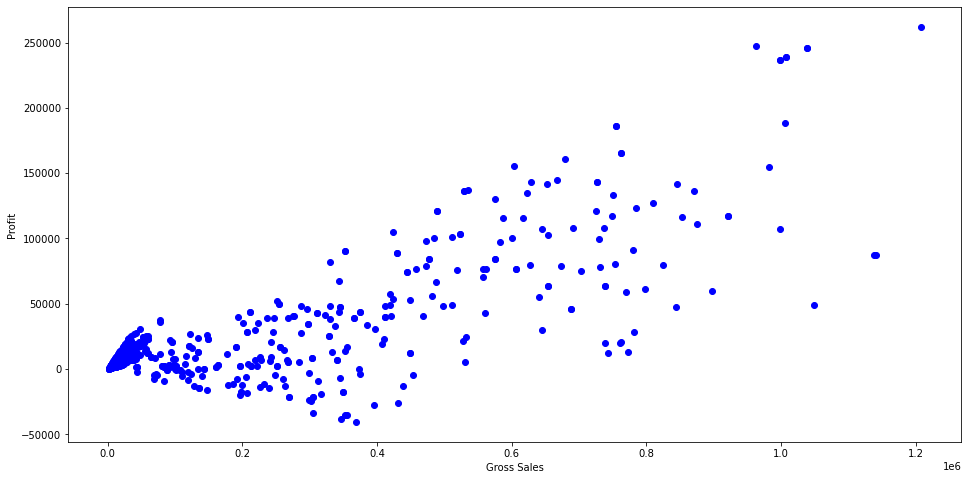

In [80]:
plt.figure(figsize=(16,8))
plt.scatter(df["Gross Sales"], df["Profit"],c="b")
plt.xlabel("Gross Sales")
plt.ylabel("Profit")
plt.show()

#### we can apply the linear regression because of the relationship between Profit and Gross Sales

In [81]:
y=df["Profit"].values.reshape(-1, 1)
x=df["Gross Sales"].values.reshape(-1, 1)
reg=LinearRegression()
reg.fit(x,y)


LinearRegression()

In [82]:
b=reg.coef_
b

array([[0.13193492]])

In [83]:
a=reg.intercept_
a

array([21.5098964])

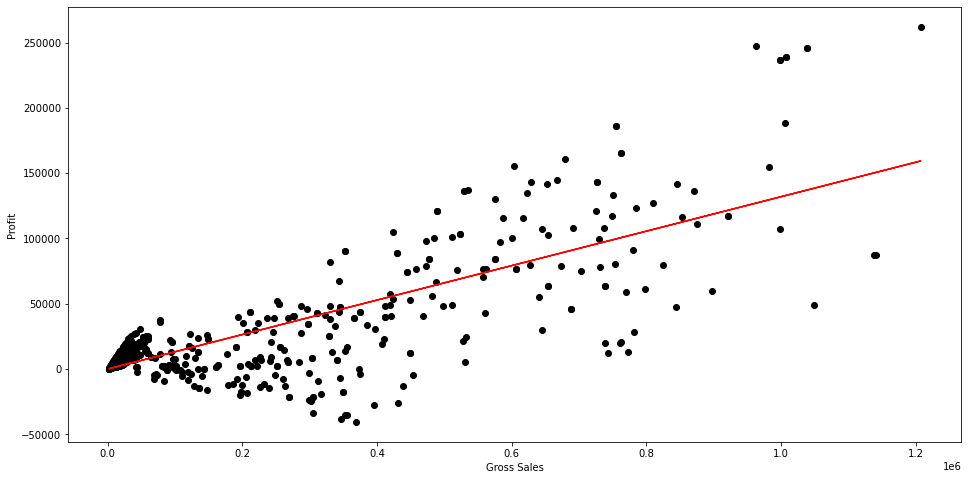

In [92]:
plt.figure(figsize=(16,8))
plt.scatter(df["Gross Sales"], df["Profit"],c="black")
plt.plot(df["Gross Sales"], reg.predict(x), c="red")
plt.xlabel("Gross Sales")
plt.ylabel("Profit")
plt.show()

In [99]:
# Now we want to see the caracteristics of the model 

X=df[["Gross Sales"]]
Y=df[["Profit"]]

Xcore=sm.add_constant(X)
LinearM=sm.OLS(Y,Xcore).fit()

print(LinearM.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1117.
Date:                Mon, 29 Nov 2021   Prob (F-statistic):          5.40e-147
Time:                        22:28:39   Log-Likelihood:                -8122.6
No. Observations:                 700   AIC:                         1.625e+04
Df Residuals:                     698   BIC:                         1.626e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          21.5099   1235.460      0.017      

**Conclusion**

- in this analysis we realize that the linear regression is not the best choice cause the independant variable explain the dependent variable just 61.5% (R-squared)
- the Gradient descent is also too low (the Gross Sales not really explain the profit, i.e if the Gross sales increase to 1 dollar, the profit also will increase to 0.13$)